In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [2]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:3]:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
... ---> a
..a ---> v
.av ---> a
ava ---> .


In [6]:
Y.shape

torch.Size([16])

In [7]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0])

In [8]:
X.shape

torch.Size([16, 3])

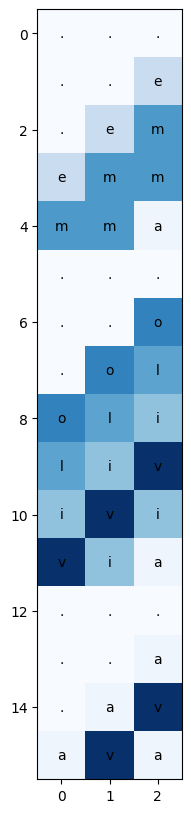

In [9]:
plt.figure(figsize=(20, 10))
plt.imshow(X.detach().numpy(), cmap='Blues')
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    plt.text(j, i, itos[X[i,j].item()], ha='center', va='center', color='black')

In [10]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([16, 3]), torch.int64, torch.Size([16]), torch.int64)

In [11]:
C = torch.randn(27, 2) # 27 characters, 2 dimensions => embedding matrix

In [12]:
C

tensor([[ 0.0908, -1.2673],
        [ 0.5940,  0.3995],
        [-0.9778, -0.4302],
        [ 0.0275,  0.2539],
        [-0.9306,  0.6208],
        [-1.6818,  0.7796],
        [-1.9148, -0.9575],
        [ 0.0194,  0.1027],
        [-0.5190,  1.8888],
        [-1.8366, -0.5436],
        [ 0.3281, -0.7967],
        [ 0.4853, -1.4564],
        [-1.5104,  0.9056],
        [-0.4726, -0.2539],
        [ 0.2426,  0.4971],
        [-1.4125,  2.4021],
        [ 1.7697,  0.2844],
        [ 0.4347, -1.3369],
        [ 0.1509,  1.5022],
        [ 1.5022, -1.9691],
        [-0.1043, -1.2951],
        [-0.9431,  1.3926],
        [-0.5847, -1.6462],
        [ 1.0231,  0.6105],
        [ 0.3625,  1.5357],
        [-0.2454, -0.4855],
        [ 0.6268, -1.2422]])

In [13]:
C[5]

tensor([-1.6818,  0.7796])

In [14]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C  # matrix multiplication just selects the 5th row

tensor([-1.6818,  0.7796])

In [15]:
C[torch.tensor([5,6,7])]

tensor([[-1.6818,  0.7796],
        [-1.9148, -0.9575],
        [ 0.0194,  0.1027]])

In [16]:
C[X].shape # embedding lookup

torch.Size([16, 3, 2])

In [17]:
X[13,2]

tensor(1)

In [18]:
C[X][13,2]

tensor([0.5940, 0.3995])

In [19]:
C[X[13,2]]

tensor([0.5940, 0.3995])

In [20]:
C[1]

tensor([0.5940, 0.3995])

In [21]:
emb = C[X]
emb.shape

torch.Size([16, 3, 2])

In [22]:
# Hidden layer
W1 = torch.rand((3 * 2, 100))
b1 = torch.randn(100)

In [23]:
torch.cat([emb[:,0], emb[:,1], emb[:,2]], dim=1).shape

torch.Size([16, 6])

In [24]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1).shape

torch.Size([16, 6])

In [25]:
torch.unbind(emb, dim=1)[0].shape

torch.Size([16, 2])

In [26]:
len(torch.unbind(emb, dim=1))

3

In [27]:
torch.cat(torch.unbind(emb, dim=1), dim=1).shape

torch.Size([16, 6])

In [28]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [29]:
a.shape

torch.Size([18])

In [30]:
a.view(3, 6)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17]])

In [31]:
a.view(3, 2, 3)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])

In [32]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [33]:
a.storage_offset()

0

In [34]:
a.stride()

(1,)

In [35]:
emb.shape

torch.Size([16, 3, 2])

In [36]:
emb.view(emb.shape[0], -1).shape

torch.Size([16, 6])

In [37]:
h = emb.view(emb.shape[0], -1) @ W1 + b1

In [38]:
h.shape

torch.Size([16, 100])

In [39]:
b1.shape

torch.Size([100])

In [40]:
# 16  100   broadcasting => 16 100  => 16 100
#     100                    1 100     16 100

In [41]:
h = torch.tanh(h)

In [42]:
W2 = torch.rand((100, 27))
b2 = torch.randn(27)

In [43]:
logits = h @ W2 + b2

In [44]:
logits.shape

torch.Size([16, 27])

In [45]:
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)

In [46]:
probs.shape

torch.Size([16, 27])

In [47]:
probs[0].sum()

tensor(1.0000)

In [48]:
Y  # the correct labels

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0])

In [49]:
Y.shape

torch.Size([16])

In [50]:
probs[torch.arange(16), Y] # select the correct probability for each example
# Ideally, we want them to be 1.0

tensor([5.6441e-06, 1.5251e-04, 1.7866e-04, 6.8015e-06, 1.9162e-02, 3.1846e-04,
        3.5093e-03, 2.7637e-01, 2.9182e-05, 5.9710e-02, 2.2705e-05, 4.7120e-01,
        9.4290e-06, 7.4273e-04, 1.2222e-04, 3.4520e-02])

In [51]:
probs.max(dim=1).values  # the most probable letter in the alphabet to continue the word

tensor([0.6962, 0.5838, 0.7021, 0.7753, 0.8438, 0.6962, 0.6591, 0.3245, 0.8942,
        0.9057, 0.8815, 0.4712, 0.6962, 0.7047, 0.5801, 0.8573])

In [52]:
loss = -torch.log(probs[torch.arange(16), Y]).mean()

In [53]:
loss

tensor(7.2628)

## Puttting it all together

In [54]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [55]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [400]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [57]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [395]:
emb = C[Xtr]
h = torch.tanh(emb.view(emb.shape[0], -1) @ W1 + b1)
logits = h @ W2 + b2
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)
loss = -torch.log(probs[torch.arange(Xtr.shape[0]), Ytr]).mean()
loss.item()

26.004695892333984

In [386]:
logits.shape

torch.Size([182625, 27])

In [59]:
F.cross_entropy(logits, Ytr).item()

26.00469207763672

In [60]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [374]:
logits = torch.Tensor([-5, -3, 0, 10])
true_label = torch.tensor([3]) # the correct label is number 3
counts = logits.exp()
probs = counts / counts.sum()  # softmax
one_hot_labels = torch.zeros(len(true_label), len(probs))
one_hot_labels.scatter_(1, true_label.view(-1, 1), 1)
one_hot_labels

tensor([[0., 0., 0., 1.]])

In [375]:
probs

tensor([3.0589e-07, 2.2602e-06, 4.5398e-05, 9.9995e-01])

In [376]:
F.softmax(logits, dim=0)

tensor([3.0589e-07, 2.2602e-06, 4.5398e-05, 9.9995e-01])

In [377]:
counts = logits.exp()
probs = counts / counts.sum(dim=0, keepdim=True)
loss = -torch.log(probs[true_label]).mean()
loss

tensor(4.7983e-05)

In [378]:
loss = -torch.sum(torch.log(probs) * one_hot_labels)
loss

tensor(4.7983e-05)

In [379]:
loss_ce = -torch.sum(torch.log(probs) * F.one_hot(true_label.long(), num_classes=len(probs)))
loss_ce

tensor(4.7983e-05)

In [380]:
F.cross_entropy(logits.view(1, -1), true_label)

tensor(4.7921e-05)

In [382]:
F.nll_loss(torch.log(probs).view(1,-1), true_label)

tensor(4.7983e-05)

## Putting it all together

In [536]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182441, 3]) torch.Size([182441])
torch.Size([22902, 3]) torch.Size([22902])
torch.Size([22803, 3]) torch.Size([22803])


In [537]:
g = torch.Generator().manual_seed(2147483647)  # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [538]:
emb = C[Xtr]
h = torch.tanh(emb.view(emb.shape[0], -1) @ W1 + b1)
logits = h @ W2 + b2
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)
loss = -torch.log(probs[torch.arange(Xtr.shape[0]), Ytr]).mean()
loss.item()

25.99271011352539

In [539]:
lri = []
lossi = []
stepi = []

In [540]:
for p in parameters:
  p.requires_grad = True

In [541]:
lre = torch.linspace(-3, -1, 50000)
lrs = 10**lre

In [542]:
for i in range(50000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = lrs[i]
  # lr = 0.1 if i < 1000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

26.24364471435547
25.43636703491211
27.87995719909668
25.321704864501953
29.593721389770508
28.463245391845703
26.41199493408203
24.829605102539062
29.114383697509766
24.589168548583984
25.59212303161621
25.152019500732422
26.487707138061523
24.974824905395508
28.650741577148438
26.720165252685547
24.827089309692383
22.97892951965332
28.822925567626953
25.83462142944336
25.672019958496094
21.430892944335938
26.360431671142578
22.22762107849121
27.03169059753418
22.73283576965332
23.21772575378418
22.566965103149414
24.50821876525879
24.346500396728516
27.140714645385742
25.09798240661621
24.184011459350586
21.933773040771484
22.534666061401367
23.359888076782227
23.77385902404785
21.99981117248535
26.407140731811523
24.053159713745117
22.856882095336914
21.904890060424805
22.609642028808594
23.348466873168945
19.415552139282227
22.55443000793457
22.074365615844727
26.27121925354004
25.4791202545166
22.410812377929688
24.599689483642578
21.37747573852539
25.557594299316406
24.6495609283

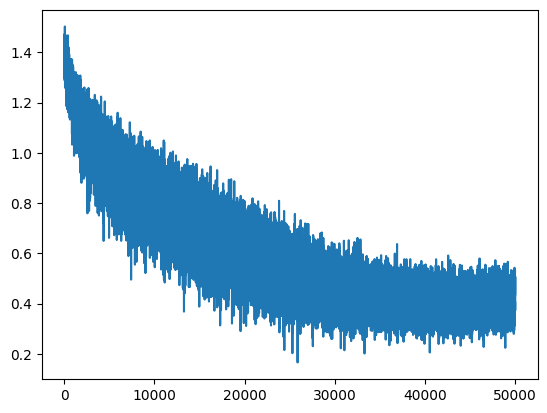

In [543]:
plt.plot(stepi, lossi)

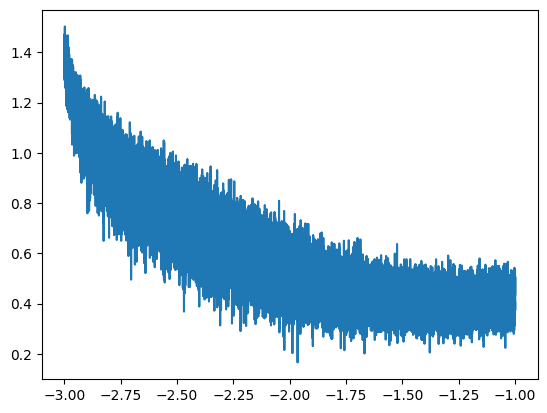

In [544]:
plt.plot(lri, lossi)

In [545]:
logits.max(dim=1)

torch.return_types.max(
values=tensor([ 8.1103,  9.4947,  7.4190,  5.7294,  8.8978,  0.1202,  0.1202,  7.4628,
         7.7767,  7.8625,  0.1202,  8.2357,  5.3684,  7.1467,  9.8291,  8.7086,
         4.3681,  3.8419,  3.1731,  8.0220, 10.8680,  4.7871,  3.0779,  4.4393,
         9.1302, 10.3589,  8.5001,  0.1202,  9.0616,  4.2830,  0.1202,  5.5019],
       grad_fn=<MaxBackward0>),
indices=tensor([19,  0, 25,  9,  1, 12, 12,  1, 14,  1, 12,  0,  1,  7, 26,  0, 25,  1,
        12, 14,  8, 12, 15,  5,  0, 26, 14, 12, 19,  5, 12,  8]))

In [546]:
Ytr[ix]

tensor([19,  1,  5, 12,  5,  8, 14, 25, 14,  5, 15, 19,  1,  0,  0,  0,  0,  9,
        11,  1,  0, 25,  8, 15,  0, 12, 14, 14,  1, 18,  1, 11])

In [547]:
# validation loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.6333, grad_fn=<NllLossBackward0>)

## Complete code

In [568]:
# build the dataset
block_size = 4 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182512, 4]) torch.Size([182512])
torch.Size([22860, 4]) torch.Size([22860])
torch.Size([22774, 4]) torch.Size([22774])


In [569]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 15), generator=g)
W1 = torch.randn((60, 250), generator=g)
b1 = torch.randn(250, generator=g)
W2 = torch.randn((250, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [570]:
for p in parameters:
  p.requires_grad = True

In [571]:
lri = []
lossi = []
stepi = []

In [572]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

24.420621871948242
25.05547523498535
20.631025314331055
25.24134063720703
21.216033935546875
27.0977725982666
27.897594451904297
24.86856460571289
23.466812133789062
25.488525390625
20.214921951293945
20.810630798339844
19.373411178588867
17.966350555419922
22.936328887939453
20.254911422729492
17.97187042236328
15.985392570495605
19.983800888061523
17.435779571533203
19.352190017700195
19.245555877685547
15.592427253723145
19.98263168334961
17.345104217529297
13.417556762695312
21.019771575927734
20.001216888427734
16.732192993164062
12.62280559539795
14.16728687286377
16.161231994628906
18.033002853393555
13.878300666809082
16.30831527709961
16.950002670288086
15.519842147827148
14.304603576660156
14.051133155822754
13.605042457580566
16.92652130126953
12.638995170593262
16.94112777709961
11.970539093017578
15.281798362731934
10.652138710021973
15.742716789245605
14.661727905273438
11.135512351989746
14.201764106750488
13.237935066223145
14.539433479309082
11.701147079467773
17.28747

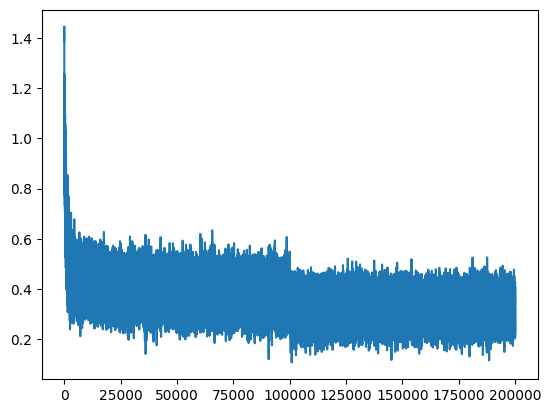

In [573]:
plt.plot(stepi, lossi)

In [577]:
# validation loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2010, grad_fn=<NllLossBackward0>)

In [578]:
# test loss
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.2045, grad_fn=<NllLossBackward0>)

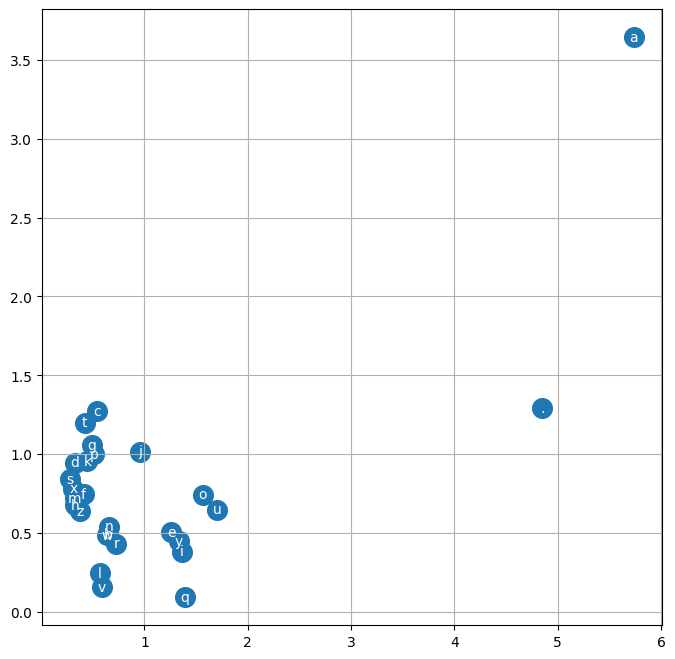

In [579]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [580]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

careah.
amelle.
khiemre.
reaty.
salanan.
jaronen.
deliah.
jaree.
coramara.
chaiir.
kaleigh.
hamon.
cadquisten.
lilea.
jadiq.
watell.
dearynix.
kaevissul.
med.
emii.
